In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
N = 3000
dims = 2

X = []
means = []
k = 5

In [3]:
N = 3000
dims = 2

In [4]:
X = []
means = []
k = 5

for i in range(k):
  X.append(np.random.randn(N, dims) + np.random.randn(1, dims)*3.4)
  means.append(np.mean(X[-1], axis=0))

X = np.vstack(X)
means=np.vstack(means)

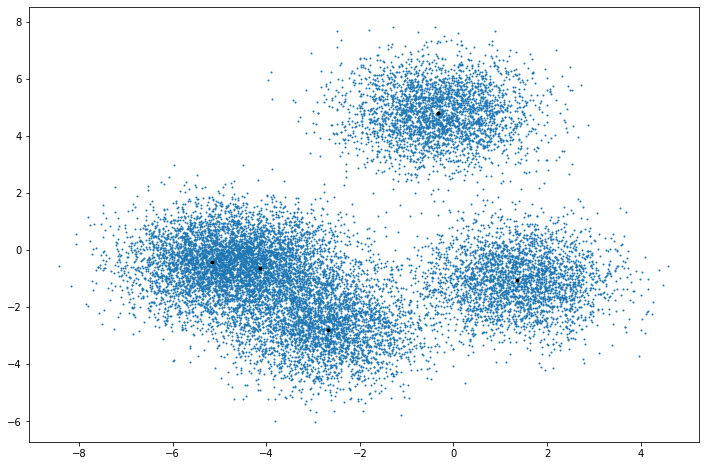

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [6]:
def Distance(X, means, *args, **kwargs):
  diff=[]
  dists=[]
  for mean in means:
    diff = X-mean
    dist = np.sqrt(np.sum(diff**2, axis=1, keepdims=True))
    dists.append(dist)
  return np.hstack(dists)


In [7]:
dist = Distance(X, means)

In [8]:
y_hat = np.argmin(dist, axis=1)

In [9]:
dist

array([[1.49245272, 2.94880892, 4.44633068, 3.44776941, 7.32726899],
       [0.30996241, 4.70200479, 3.25429937, 2.49026825, 8.08808335],
       [1.16282586, 3.27996323, 4.23040202, 3.25744409, 7.48818625],
       ...,
       [7.48536783, 5.51375903, 6.86751358, 6.30783831, 0.58627555],
       [9.38081265, 6.71452865, 8.94919381, 8.37415244, 1.92601571],
       [8.65551153, 6.84007271, 7.65598891, 7.23143249, 0.75510508]])

In [10]:
y_hat

array([0, 0, 0, ..., 4, 4, 4])

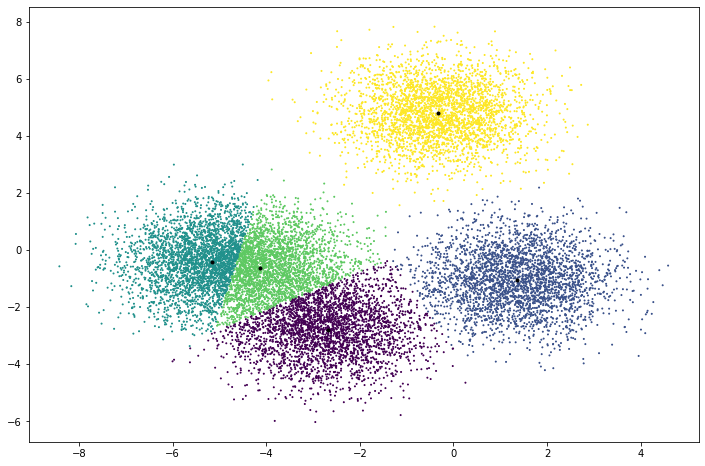

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [12]:
indices = np.arange(X.shape[0])
sample_indices = np.random.choice(indices, size=k, replace=False)
means=X[sample_indices]

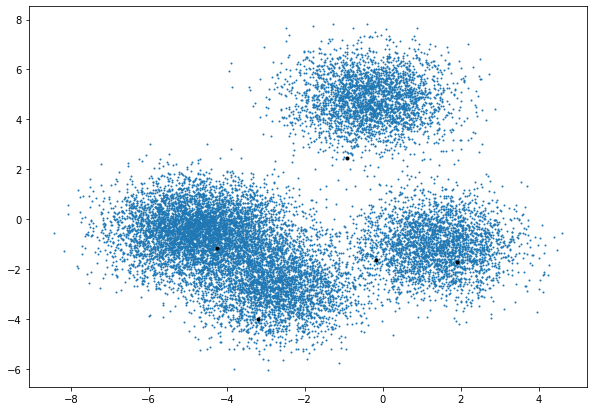

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [14]:
dist = Distance(X, means)
y_hat= np.argmin(dist, axis=1)

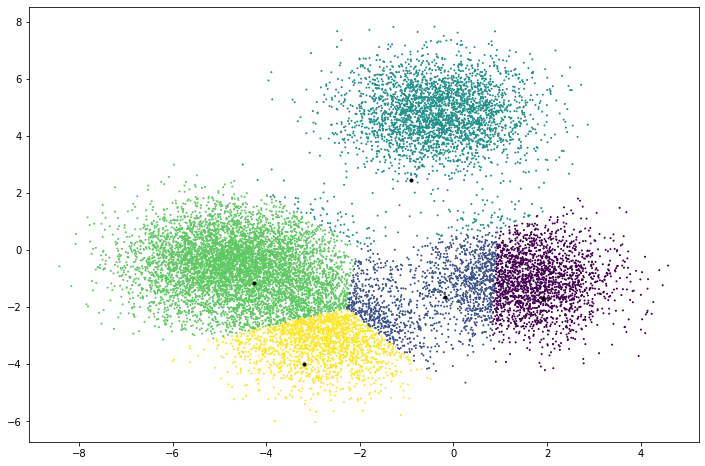

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [16]:
means=[]
for i in range(k):
  mean = np.mean(X[y_hat==i], axis=0)
  means.append(mean)
means = np.vstack(means)


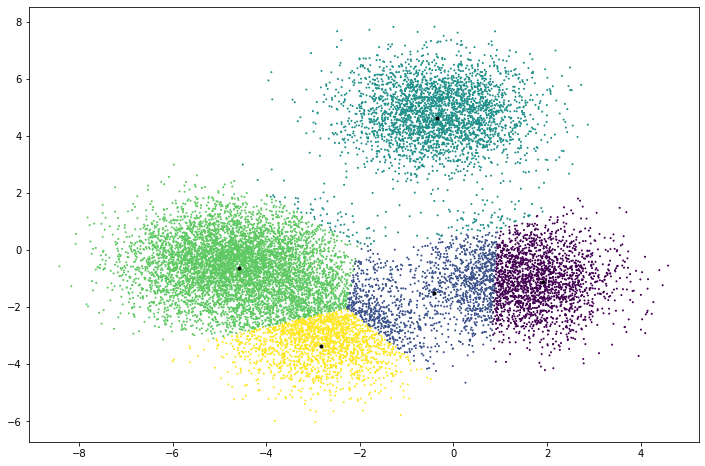

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [18]:
#This classifies based on distance
dist = Distance(X, means)
y_hat= np.argmin(dist, axis=1)

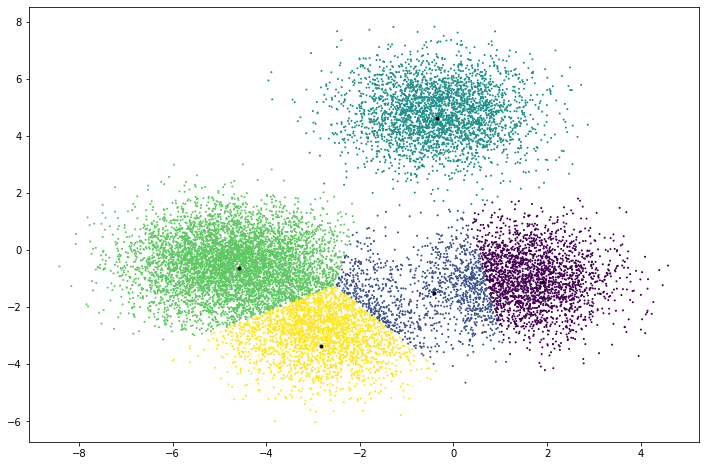

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [20]:
#This calculate the new centroid
means=[]
for i in range(k):
  mean = np.mean(X[y_hat==i], axis=0)
  means.append(mean)
means = np.vstack(means)


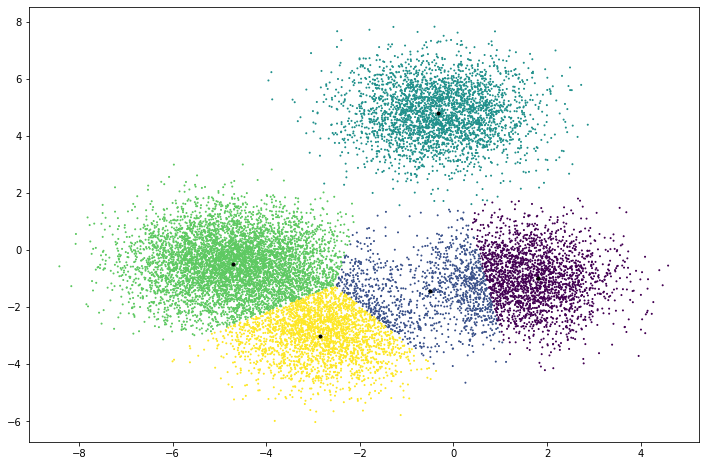

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

In [22]:
def Kmeans(x, k, iterations=3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices, size=k, replace=False)
  means=X[sample_indices]

  for i in range(iterations):
    #this classifies based on distance
    dist = Distance(X, means)
    y_hat= np.argmin(dist, axis=1)

    #this step recalculates the means
    means = []
    for i in range(k):
      mean = np.mean(X[y_hat==i], axis=0)
      means.append(mean)
    means = np.vstack(means)
    
  dist = Distance(X, means)
  y_hat=np.argmin(dist, axis=1)

  return(y_hat, means)


In [23]:
y_hat, means = Kmeans(X, 5, iterations=8)

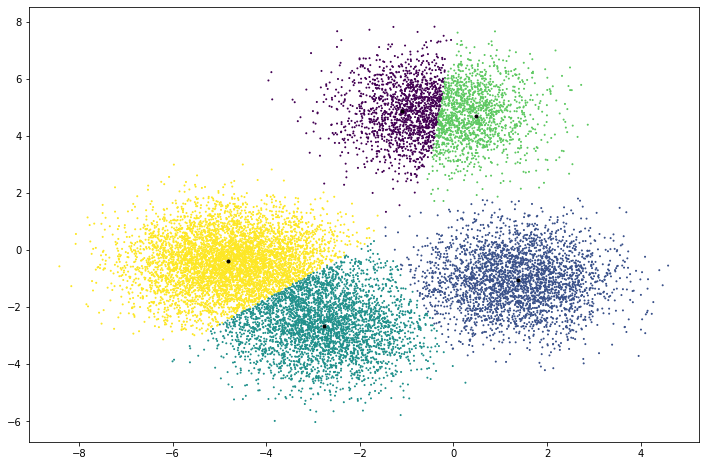

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=9)

Unsupervised NLP using GUSE and K-means

$ r_{i,k} =\frac{e^{-\beta || x_i - m_k||^2}}{\sum_{i=0}^{N} e^{-\beta || x_i - m_k||^2}} $ 

$m_k=\frac{\sum_i^N r_{i,k} x_i}{\sum r_{s,k}}$

In [25]:
def Responsability(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [26]:
import tensorflow as tf
import tensorflow_hub as hub

In [27]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re

In [28]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedder = hub.load(module_url)

In [29]:
def TextPreProcessing(sentence):
  text = sentence.lower().strip()
  text_p = "".join(char for char in text if char not in string.punctuation)
  clean_sentence = text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text_p)
  return clean_sentence


In [30]:
def embed(sentence):
  sentence_in = [sentence]
  return embedder(sentence_in)

In [31]:
def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X = data.Tweet
  return X

In [32]:
def LoadVectors(X):
  Dict_of_Sentences = dict()
  for i in range(len(X)):
    Dict_of_Sentences[i] = {'sentence': X[i], 'vector': embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

In [33]:
X = data_load('/content/drive/MyDrive/Colab Notebooks/Enhance IT/K means/data_elonmusk2.csv')

In [34]:
X

0       @MeltingIce Assuming max acceleration of 2 to ...
1       RT @SpaceX: BFR is capable of transporting sat...
2                                          @bigajm Yup :)
3                          Part 2 https://t.co/8Fvu57muhM
4       Fly to most places on Earth in under 30 mins a...
                              ...                        
3213    @YOUSRC Amos's article was fair, but his edito...
3214    These articles in Space News describe why Aria...
3215    Was misquoted by BBC as saying Europe's rocket...
3216    Just returned from a trip to London and Oxford...
3217    RT @Jon_Favreau: My Model S just arrived and I...
Name: Tweet, Length: 3218, dtype: object

In [35]:
X.shape

(3218,)

In [36]:
My_NLP_dict = LoadVectors(X)

In [ ]:
My_NLP_dict

In [ ]:
class K_Means:
  def __init__(self, k=3, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means=[]
      for j in range(self.k):
        mean=np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means=np.vstack(self.means)

    y_hat=self.Predict(X)
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k',s=10)

    return y_hat
  
  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta)
    y_hat = np.argmin(dist,axis=1)
    return y_hat

In [ ]:
vector_tweets=[]
for i in range(len(X)):
  vector_tweets.append(np.hstack(My_NLP_dict[i]['vector'].numpy())) 
vector_tweets = np.vstack(vector_tweets)

In [ ]:
vector_tweets[1]

array([ 0.01734015, -0.06106213, -0.06993027, -0.02294972,  0.05615214,
       -0.07459833, -0.05954868, -0.01459511, -0.02135428, -0.05368631,
        0.04651807,  0.05609907, -0.06865942, -0.04558478, -0.02427234,
       -0.04405522,  0.03987061,  0.04112512,  0.00963938,  0.06971433,
       -0.01230996, -0.00133641,  0.04094636,  0.07408419,  0.0419018 ,
       -0.00599726,  0.03401946, -0.02129944, -0.05508552, -0.0533784 ,
       -0.06532577,  0.02602362, -0.07273452, -0.04353828,  0.05333288,
       -0.06601047,  0.01036436,  0.04734929,  0.05103682,  0.00048286,
        0.0617723 ,  0.02654728, -0.06029916, -0.00557695, -0.06749777,
        0.06509016,  0.04440732, -0.02439546, -0.04603451,  0.07415035,
       -0.05738207, -0.01222602, -0.02206281,  0.06495102, -0.07289523,
        0.07212436, -0.03919563,  0.04354513,  0.01237272,  0.04284554,
        0.02290025, -0.07287591,  0.05132308,  0.01019896, -0.02939525,
       -0.00577107,  0.00889853,  0.04060297, -0.05848072,  0.06

In [ ]:
vector_tweets[1:3]

array([[ 0.01734015, -0.06106213, -0.06993027, ...,  0.02043619,
        -0.01934779, -0.01334572],
       [ 0.04200516, -0.02571639,  0.00646962, ..., -0.04399165,
         0.00909323, -0.05910819]], dtype=float32)

In [ ]:
tweetcluster = K_Means(k=12)

array([ 1, 11,  6, ...,  1, 10,  8])

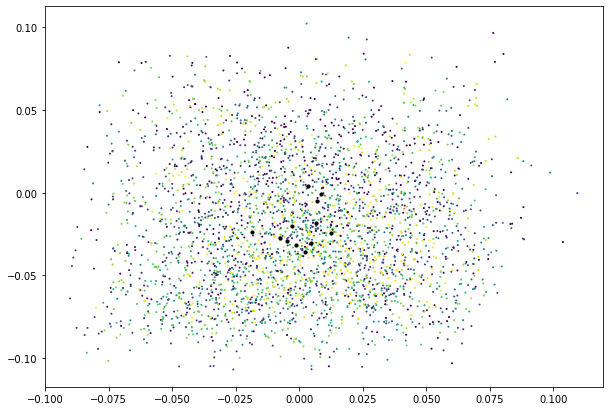

In [ ]:
tweetcluster.fit(vector_tweets, iterations = 20)

In [ ]:
y_hat = tweetcluster.Predict(vector_tweets)

In [ ]:
y_hat

array([ 1, 11,  6, ...,  1, 10,  8])

In [ ]:
for i in range (len(X)):
  print(y_hat[i], " ", My_NLP_dict[i]["sentence"])

1   @MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC
11   RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?
6   @bigajm Yup :)
0   Part 2 https://t.co/8Fvu57muhM
9   Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd
11   RT @SpaceX: Supporting the creation of a permanent, self-sustaining human presence on Mars. https://t.co/kCtBLPbSg8 https://t.co/ra6hKsrOcG
7   BFR will take you anywhere on Earth in less than 60 mins https://t.co/HWt9BZ1FI9
7   Mars City
Opposite of Earth. Dawn and dusk sky are blue on Mars and day sky is red. https://t.co/XHcZIdgqnb
4   Moon Base Alpha https://t.co/voY8qEW9kl
5   Will be announcing something really special at today's talk https://t.co/plXTBJY6ia
11   RT @SpaceX: Nine years ago today, Falcon 1 became th

In [ ]:
tweet_cluster_soft = K_Means(k=12, distance_func = Responsability, beta = 1.6)

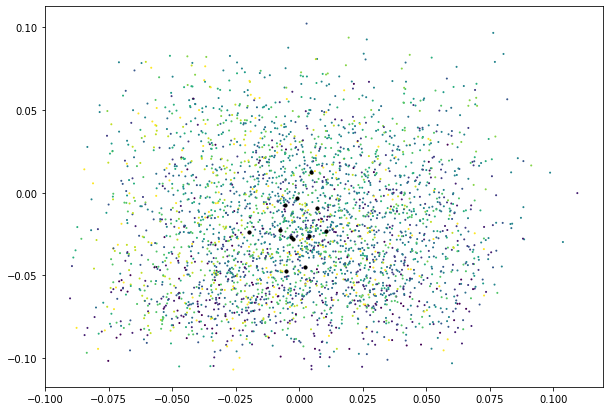

In [ ]:
y_hat2 = tweet_cluster_soft.fit(vector_tweets, iterations = 10)

In [ ]:
sentences = []
for i in range(len(X)):
  sentences.append(My_NLP_dict[i]['sentence'])

In [ ]:
results_df = pd.DataFrame(y_hat, sentences)

In [ ]:
results_df

,0
"@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC",1
"RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?",11
@bigajm Yup :),6
Part 2 https://t.co/8Fvu57muhM,0
Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd,9
...,...
"@YOUSRC Amos's article was fair, but his editor chose a more sensational headline & used quotes even though I didn't actually say that.",2
These articles in Space News describe why Ariane 6 vs 5: http://t.co/IaeYXXK9 and http://t.co/ghs3FG8w,4
"Was misquoted by BBC as saying Europe's rocket has no chance. Just said the [Franco-German] Ariane 5 has no chance, so go with Ariane 6.",1
"Just returned from a trip to London and Oxford, where I met with many interesting people. I really like Britain!",10
